In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
num_classes = 10
(x_train,y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)
print(x_train[0].shape)
print(y_train.shape)


170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(32, 32, 3)
(50000, 1)


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<function matplotlib.pyplot.show>

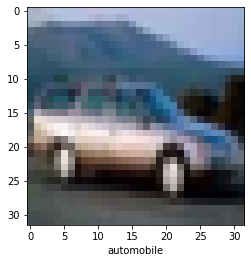

In [7]:
plt.imshow(x_train[4])
plt.xlabel(class_names[y_train[4]])
plt.show

In [8]:

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3),padding='Same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3), padding='Same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3), padding='Same',activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
def generator(x_train, y_train, batch_size):
  while True:
    x_train, y_train = shuffle(x_train, y_train)

    for start in range(0, x_train.shape[0], batch_size):
      x_batch = x_train[start: start + batch_size]
      y_batch = y_train[start: start + batch_size]
      yield x_batch, y_batch

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='weights-best-file.hdf5', 
                                                monitor = 'accuracy', 
                                                verbose = 1, 
                                                save_best_only=True,)

callback = [checkpoint]

In [12]:

history = model.fit(generator(x_train, y_train,1000) ,epochs=30, batch_size=1000, steps_per_epoch=len(x_train)//1000, callbacks=callback)


Epoch 1/30
50/50 [==============================] - 30s 52ms/step - loss: 1.9193 - accuracy: 0.3078

Epoch 00001: accuracy improved from -inf to 0.30780, saving model to weights-best-file.hdf5
Epoch 2/30
50/50 [==============================] - 3s 53ms/step - loss: 1.5109 - accuracy: 0.4650

Epoch 00002: accuracy improved from 0.30780 to 0.46500, saving model to weights-best-file.hdf5
Epoch 3/30
50/50 [==============================] - 3s 54ms/step - loss: 1.3768 - accuracy: 0.5114

Epoch 00003: accuracy improved from 0.46500 to 0.51138, saving model to weights-best-file.hdf5
Epoch 4/30
50/50 [==============================] - 3s 53ms/step - loss: 1.2897 - accuracy: 0.5437

Epoch 00004: accuracy improved from 0.51138 to 0.54366, saving model to weights-best-file.hdf5
Epoch 5/30
50/50 [==============================] - 3s 54ms/step - loss: 1.2165 - accuracy: 0.5718

Epoch 00005: accuracy improved from 0.54366 to 0.57180, saving model to weights-best-file.hdf5
Epoch 6/30
50/50 [=========

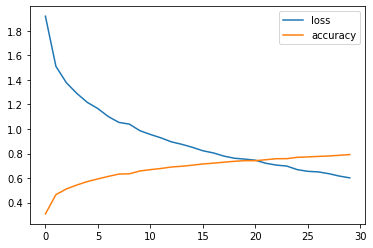

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.8212 - accuracy: 0.7211


[0.8211804628372192, 0.7210999727249146]

y_label cat


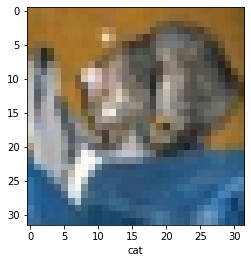

y_label ship


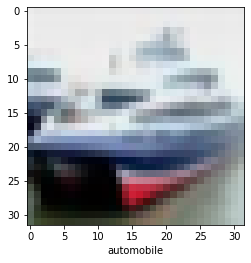

y_label ship


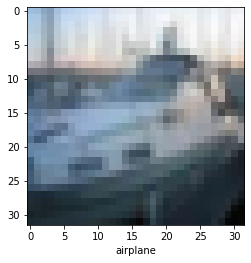

y_label airplane


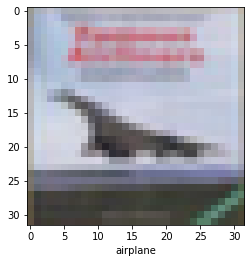

y_label frog


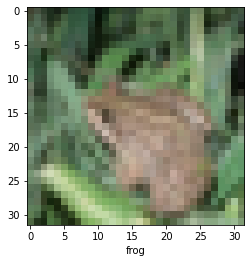

y_label frog


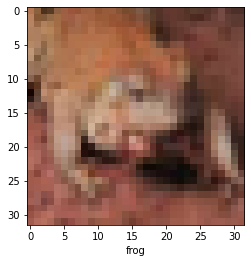

y_label automobile


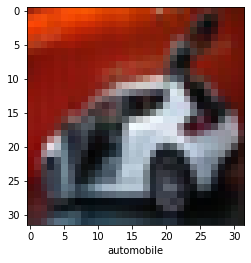

y_label frog


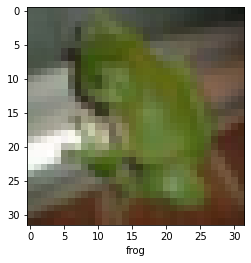

y_label cat


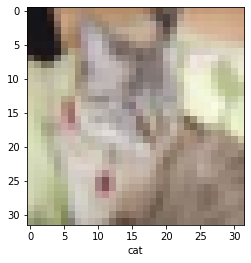

y_label automobile


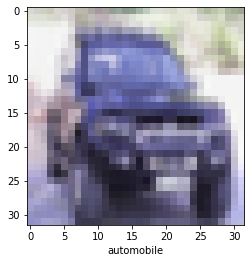

In [16]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
for i in range(10):
    plt.imshow(x_test[i], 'gray')
    plt.xlabel(class_names[y_predicted_labels[i]])
    print("y_label",class_names[y_test[i]])
    plt.show()